# Artificial Neural Network in Julia
#### Isabel De La Cruz

### What is a Neural network?

Artificial neural network(ANN) was derived from the analogy of biological neural networks. Its purpose it to develop a system to perfrom various computational tasks faster than traditional systems. 

### Biological Neural Network 
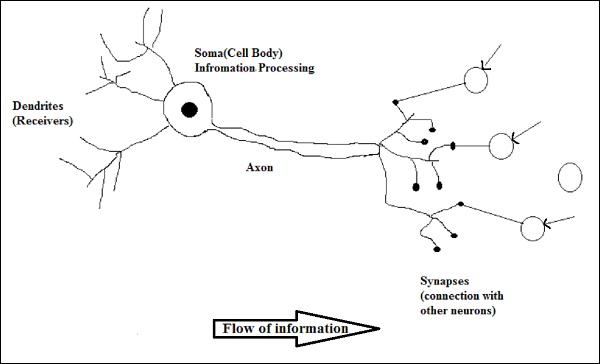

### Artificial Neural Network 
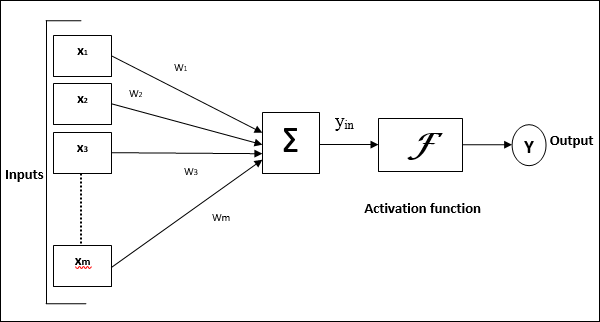

We will be using the **MNIST** dataset to implement the ANN algorithm.

### An example of the **MNIST** data:
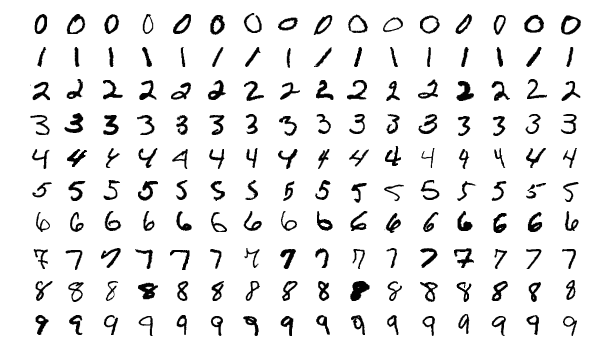

In [1]:
#import necessary packages
using MLDatasets
using Images
using Plots

#gather data
train_x, train_y = MNIST.traindata();
test_x, test_y = MNIST.testdata();

The first image in our train data is labeled 5

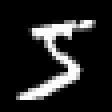

In [2]:
#displaying data
print("The first image in our train data is labeled ", train_y[1])
colorview(Gray, train_x[:, :, 1]')

Each training image is a 28x28 matrix. In orrder to pass these images into our neural network we will need to flatten the training instances(matrices) into a set of vectors. This can be done with the following code. 

In [3]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:, :, i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end
train_data = [x for x in zip(X, Y)];


X2 = []
Y2 = []

for i = 1:10000
    push!(X2, reshape(test_x[:, :, i], 784))
    y2 = zeros(10)
    y2[test_y[i] + 1] = 1.0
    push!(Y2, y2)
end
test_data = [x for x in zip(X2, Y2)];

### Creating the model

In [4]:
#Define the activation function and its derivative
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x) .* (1 - σ(x))


#define a neural network type
mutable struct neural_network
    W
    b
end

#initialize weights(W) and biases(b)
function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)]
    b = [[0.0], randn(hidden_layer_sizes[1])]
    
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i],  hidden_layer_sizes[i-1]))
        push!(b, randn(hidden_layer_sizes[i]))
    end
    
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
            
    return neural_network(W, b)

    
end

create_network (generic function with 1 method)

In [5]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64,N} where N[[0.0], [0.4832343663223168 -2.1989494612293723 … 0.13125714539087047 0.3177976189427968; -0.10640264616178227 -1.428656747340515 … -0.09398728557047276 -0.012660536192998484; … ; 0.3935876421801731 0.15890336223762414 … -1.1281705435919143 0.23268085961860585; 1.3642573829029319 -0.20960295439961826 … -0.9910027070248955 1.4453407046089413], [0.26727508424644064 -0.818210177492266 … 1.0975279341627038 -0.840013469401754; 0.6254276666482036 -2.2707132790715576 … 0.4647100157883001 0.38380329455014445; … ; 0.7773667088078703 1.3606371316646235 … 0.13540118509075255 -2.3657207307569443; -2.8705039034667745 -1.1977874179504684 … -1.0383905635338009 -0.44749788363874704], [-0.3943689165260406 -0.12834260807436568 … -0.7243508254996922 1.0198959971688515; 0.12664705426893305 -1.2769849884688294 … 1.003020263559847 0.7480932597719799; … ; 0.7494944327526787 -0.08241761566510276 … 1.9772015241630583 0.39393806440020934; 0.8857449419099084 -0.021507364959

### Defining functions

Forward Pass function:

- To pass a given training feature set into the input layer along with a bias neuron


In [ ]:
function forward_pass(network::neural_network, training_instance)
    Z = [[0.0]]
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i]*A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    
    return Z, A
end

Prediction function:

- To predict the label of the test image


In [55]:
function predict(network::neural_network, training_instance)
    Z, A = forward_pass(network, training_instance)
    return argmax(A[end]) - 1
end

predict (generic function with 1 method)

Success Percentage Calculator Function:

- To determine the accuracy of our neural network

In [ ]:
function success_percentage(network::neural_network, data_set)
    return string("The percentage of correctly classified images is: ", (sum([predict(network,x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)).*100., " %")
end

Error function:

- To calculate the output errors and hidden layer errors 

In [43]:
function error_deltas(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    L = size(network.W)[1]
    δ = [(A[end] - training_instance[2]).*dσ.(Z[end])]
    
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end
    pushfirst!(δ, [0.0])
    return A, δ
end

error_deltas (generic function with 1 method)

In [44]:
#testing the success percentage
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 9.28 %"

In [45]:
#testing the erros function
A_test, δ_test = error_deltas(NN, train_data[1])

(Array{Normed{UInt8,8},1}[[0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8], [1.0N0f8, 0.035N0f8, 0.059N0f8, 0.067N0f8, 0.043N0f8, 0.62N0f8, 1.0N0f8, 0.992N0f8, 0.0N0f8, 0.0N0f8  …  0.996N0f8, 0.031N0f8, 0.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8, 1.0N0f8, 0.992N0f8, 0.98N0f8, 0.996N0f8], [0.0N0f8, 0.267N0f8, 0.0N0f8, 0.067N0f8, 0.996N0f8, 0.063N0f8, 0.827N0f8, 0.89N0f8, 0.035N0f8, 1.0N0f8  …  1.0N0f8, 0.0N0f8, 1.0N0f8, 0.055N0f8, 1.0N0f8, 0.89N0f8, 0.035N0f8, 0.596N0f8, 0.0N0f8, 0.078N0f8], [0.0N0f8, 1.0N0f8, 0.004N0f8, 0.973N0f8, 1.0N0f8, 1.0N0f8, 0.0N0f8, 0.0N0f8, 0.816N0f8, 0.0N0f8  …  0.118N0f8, 0.714N0f8, 1.0N0f8, 0.353N0f8, 0.988N0f8, 0.035N0f8, 0.416N0f8, 0.988N0f8, 1.0N0f8, 1.0N0f8], [0.0N0f8, 0.0N0f8, 0.831N0f8, 0.769N0f8, 0.58N0f8, 0.0N0f8, 0.0N0f8, 0.651N0f8, 0.992N0f8, 0.996N0f8]], [[0.0], [-1.3372103528948548e-8, 0.007487225071602636, 0.03002497676

### Training the Netowrk

In [46]:
function make_random_miniBatch(miniBatch_size, data_set)
    k = rand(1:size(data_set)[1] - miniBatch_size)
    return data_set[k:k + miniBatch_size]
end

function miniBatch_update!(network::neural_network, miniBatch_size::Int64, data_set, α::Float64)
    
    minibatch = make_random_miniBatch(miniBatch_size, data_set)
    L = size(network.W)[1]
    
    A, δ = error_deltas(network, minibatch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:miniBatch_size # began at 2:
        A, δ = error_deltas(network, minibatch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -= (α/miniBatch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:miniBatch_size])
        network.b[l] -= (α/miniBatch_size)*sum([δ_batch[i][l] for i = 1:miniBatch_size])
    end
end

function showTestImg(i)
    colorview(Gray, test_x[:,:,i]')
end

function showTest_example(network, i, test_data)
    println("Predict Label: ", predict(network, test_data[i]))
    println("Actual Label: ", argmax(test_data[i][2])-1)
    showTestImg(i)
end

showTest_example (generic function with 1 method)

### Testing the Data

The percentage of correctly classified images is: 9.28 %


Predict Label: 9
Actual Label: 6


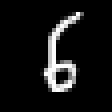

In [47]:
println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 88.58 %


Predict Label: 0
Actual Label: 0


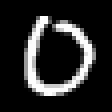

In [49]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 88.79 %


Predict Label: 7
Actual Label: 7


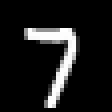

In [50]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 90.55 %


Predict Label: 8
Actual Label: 5


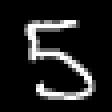

In [51]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 92.25999999999999 %


Predict Label: 5
Actual Label: 5


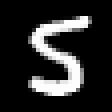

In [52]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 92.74 %


Predict Label: 5
Actual Label: 5


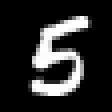

In [53]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 93.0 %


Predict Label: 9
Actual Label: 9


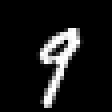

In [54]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 93.36 %


Predict Label: 7
Actual Label: 7


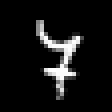

In [57]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 92.99 %


Predict Label: 8
Actual Label: 8


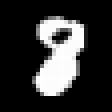

In [58]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 93.93 %


Predict Label: 6
Actual Label: 6


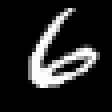

In [59]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 94.19999999999999 %


Predict Label: 5
Actual Label: 5


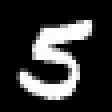

In [60]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 94.64 %


Predict Label: 1
Actual Label: 1


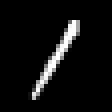

In [61]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)

The percentage of correctly classified images is: 94.56 %


Predict Label: 6
Actual Label: 6


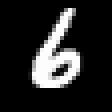

In [62]:
for _ = 1:10000
    miniBatch_update!(NN, 2, train_data, 0.4)
end

println(success_percentage(NN, test_data), "\n\n")
i = rand([x for x = 1:10000])
showTest_example(NN, i, test_data)